In [32]:
import pandas as pd

df = pd.read_csv("/Users/pranoysarath/PycharmProjects/pythonProject1/AI_FInal_project/seq_final_bert_embeddings")

In [34]:
df.columns


Index(['Unnamed: 0.1', 'Unnamed: 0', 'AssignmentId', 'story', 'sequentiality',
       'wordcount', 'Analytic', 'Clout', 'Authentic', 'Tone',
       ...
       '758', '759', '760', '761', '762', '763', '764', '765', '766', '767'],
      dtype='object', length=801)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn import preprocessing

features =['sequentiality',
        'wordcount', 'Analytic', 'Clout', 'Authentic', 'Tone',
       'wordsPerSentence', 'BigWords', 'function', 'article', 'number',
       'preposition', 'conjunction', 'negation', 'cognitiveProcess', 'insight',
       'discrepancy', 'tentative', 'certitude', 'differentiation', 'motion',
       'space', 'time', 'pastfocus', 'presentfocus', 'sentence_length',
       'realis_score', 'concretenes_score']

embedding_columns = [x for x in range(768)]

features = features + embedding_columns

X = df[features]

y = df[['story_type']]
# X_mod = preprocessing.normalize(X, axis=0)
# X_mod = pd.DataFrame(X_mod, columns=X.columns)
# X  = X_mod
le = LabelEncoder()
le.fit(['recalled', 'imagined'])
y = le.transform(y)

rfe_selector = RFE(estimator=XGBClassifier(),n_features_to_select = len(features), step = 1)


# output = []
# for i in range(len(features)):
#     print(f"Processing {i+1} features selection")
#     rfe_selector = RFE(estimator=XGBClassifier(),n_features_to_select = i + 1, step = 1)
#     rfe_selector.fit(X, y)
#     cols = X.columns[rfe_selector.get_support()].to_list()
#     output.append((cols,xgboost_train(cols)))

Train score 1.0
Test score 0.7786811201445348
f1 score weighted 0.7770700636942676
f1 score recalled 0.7802690582959642
f1 score Imagined 0.7770700636942676


<AxesSubplot: title={'center': 'Feature Importance (Top 26 features)'}, xlabel='F score', ylabel='Features'>

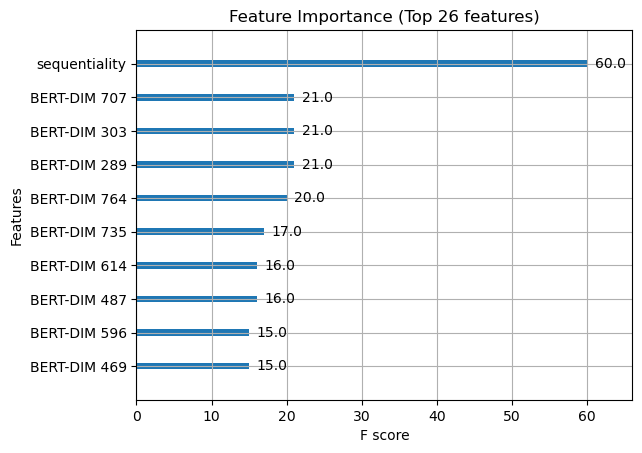

/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs

Train score 1.0
Test score 0.7786811201445348
f1 score weighted 0.7770700636942676
f1 score recalled 0.7802690582959642
f1 score Imagined 0.7770700636942676


<AxesSubplot: title={'center': 'Feature Importance (Top 26 features)'}, xlabel='F score', ylabel='Features'>

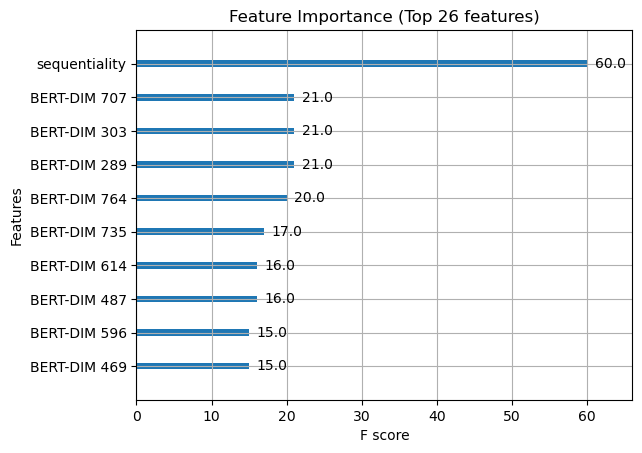

In [39]:
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier
features =['sequentiality',
        'wordcount', 'Analytic', 'Clout', 'Authentic', 'Tone',
       'wordsPerSentence', 'BigWords', 'function', 'article', 'number',
       'preposition', 'conjunction', 'negation', 'cognitiveProcess', 'insight',
       'discrepancy', 'tentative', 'certitude', 'differentiation', 'motion',
       'space', 'time', 'pastfocus', 'presentfocus', 'sentence_length',
       'realis_score', 'concretenes_score']

embedding_columns = [f"BERT-DIM {x}" for x in range(768)]
features = features + embedding_columns
renaming = {}
for i in range(768):
      renaming[str(i)] = f"BERT-DIM {i}"
df = df.rename(columns=renaming)

X = df[features]
y = df[['story_type']]

le = LabelEncoder()
le.fit(['recalled', 'imagined'])



from sklearn.model_selection import train_test_split
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

y_train_xg = le.transform(y_train)
y_test_xg = le.transform(y_test)

le = LabelEncoder()
le.fit(['recalled', 'imagined'])

y_train_xg = le.transform(y_train)
y_test_xg = le.transform(y_test)

xgb_model.fit(X_train, y_train_xg)
print("Train score", xgb_model.score(X_train, y_train_xg))
print("Test score", xgb_model.score(X_test, y_test_xg))
print("f1 score weighted", f1_score(xgb_model.predict(X_test), y_test_xg))


print("f1 score recalled", f1_score(xgb_model.predict(X_test), y_test_xg, pos_label=0))
print("f1 score Imagined", f1_score(xgb_model.predict(X_test), y_test_xg, pos_label=1))
plot_importance(xgb_model, max_num_features=10, title= 'Feature Importance (Top 26 features)')

Text(0.5, 1.0, 'Derived(28) + BERT(768)  Feature Importance (Top 10 features)')

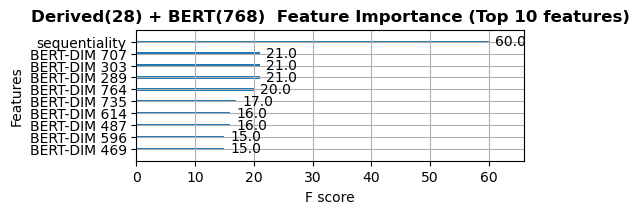

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,1.7))
plot_importance(xgb_model, max_num_features=10, title= 'Derived(28) + BERT(768)  Feature Importance (Top 10 features)', ax = ax)
plt.title("Derived(28) + BERT(768)  Feature Importance (Top 10 features)", fontweight="bold")